# Binary Logistic Regression

## Introduction

This notebook will focus on binary logistic regression, where the outcome of interest is a binary variable (example, y = 1 if healthy, and y = 0 is sick). The logistic regession models the $Pr(y = 1)$ as a function of the characteristics or features (example, X = {Income, smoker, HS graduated, etc}) of the unit of interest (example, unit = indivisual). That is the logistic model can be used to estimate the $Pr(y = 1)$ given the features of a unit. 

The logistic regression has several applications. For example it can be used to predict 1) whether a person is healthy or sick based on their characteristics, 2) whether a team wins a game based on their stats, 3) whether a student passes a test given information about how they prepared. There are several other applications such as spam detection, voting, labour force participation, unionization, marriage, etc. 

## Predictive Modeling Basics

We are interested in binary outcomes $Y \in \{0,1\}$ (ex. win or lose, married or divorced, pass or fail). Our goal is to predict $Y$ given features $X.$ In particular we want to find $P(X) = Pr(Y = 1|X),$ this is also known as the conditional choice probability. We will use flexible parameteric specefication to model $$P(X) = F(\beta_{0} + \beta_{1}X_{1} + \ldots + \beta_{k}X_{k})$$ such that $F(.)$ takes in a linear input in $(-\infty, \infty)$ and maps it to a probability in $[0,1].$ Once we compute $\widehat{P(X)} = F(\widehat{\beta_{0}} + \widehat{\beta_{1}}X_{1} + \ldots + \widehat{\beta_{k}}X_{k})$ (estimate for P(X)), we can say that we pridict $Y = 1$ if $\widehat{P(X)}$ exceeds some threshold. More specefically, 

$$Y_{predicted} = \begin{cases} 
      1 & \widehat{P(X)} > c \\
      0 & \widehat{P(X)} \leq c,
   \end{cases}
$$

where $c \in [0,1]$ is the threshold. This prediction function is illustrated below. For now suppose we know how to estimate the $k+1$ parameters, $\beta_{0}, \ldots, \beta_{k}$ we will return to the estimation later in this notebook.

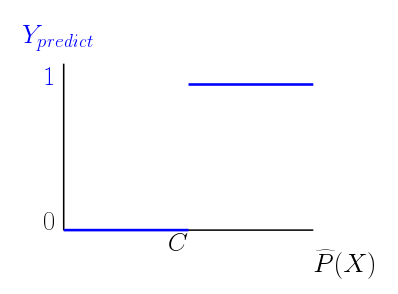

In [4]:
from IPython.display import Image, display
display(Image(filename='Ypredicted.png', embed=True))

## Linear Probability Model

Let $Y \in \{0,1\}$ be a binary variable and suppose we have $k$ features $X_{1}, \ldots, X_{k}.$ Let us use a linear regression to predict $Y$ based on our given features:

$$Pr(Y = 1|X) = \beta_{0} + \beta_{1}X_{1} + \ldots + \beta_{k}X_{k}.$$

Refering to the previous section, in this case we $F(a) = a.$ One clear problem with this is that although this linear $F(a)$ takes in inpute in $(-\infty,\infty),$ it does not output a probability between $[0,1]$. That is the linear model prediction of $\widehat{P(X)} = \widehat{\beta_{0}} + \ldots + \widehat{\beta_{k}}X_{k}$ can take on values outside of $[0,1].$ 

### Linear Classification 

Suppose we pick $c = 0.5$ and use this to do classification, that is $Y_{predicted} = 1$ if $\widehat{P(X)} > 0.5$ and the prediction is 0 otherwise. For simplicity, suppose $Pr(Y = 1|X) = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2},$ then $Y_{predicted} = 1$ if $$\widehat{P(X)} > 0.5 \implies \widehat{\beta_{0}} + \widehat{\beta_{1}}X_{1} + \widehat{\beta_{2}}X_{2} > 0.5 \implies \widehat{\beta_{1}}X_{1} + \widehat{\beta_{2}}X_{2} > 0.5-\widehat{\beta_{0}}.$$ The equation $\widehat{\beta_{1}}X_{1} + \widehat{\beta_{2}}X_{2} = 0.5-\widehat{\beta_{0}}$ is called the decesion boundary as the prediction of $Y_{predicted} \in \{0,1\}$ depends on the side of the boundary you are on. The figure below illustrates linear classification in the case of a binary outcome and two features. 

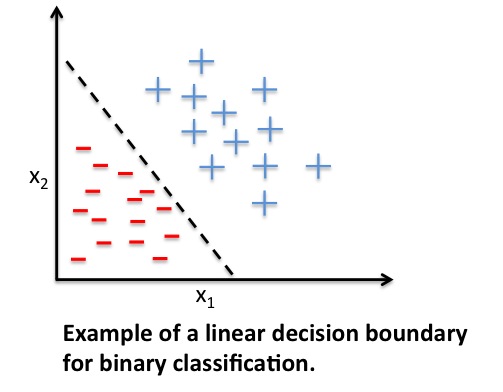

In [211]:
display(Image(filename='LinearClassification.png', embed=True))

## Logistic Model

The main difference between the logistic and linear model is that the logistic model uses $g(a) = \frac{1}{1+e^{-a}}$ instead of $f(a) = a$. The logistic function $g(a)$ is shown below. It is important to note that $g(a) > 0.5$ when a > 0 and similarly $g(a) \le 0.5$ when $a \le 0.$

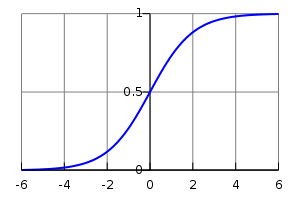

In [210]:
display(Image(filename='LogisticFunction.png', embed=True))

Now the conditional probability function is $$Pr(Y = 1|X) = g(\beta_{0} + \beta_{1}X_{1} + \ldots + \beta_{k}X_{k}), \ \text{where}, \ g(a) = \frac{1}{1+e^{-a}}.$$ That is, $$Pr(Y = 1|X) = \frac{1}{1 + e^{-(\beta_{0} + \beta_{1}X_{1} + \ldots + \beta_{k}X_{k})}}.$$
We can rearrange to isolate for the linear terms and obtain $$log(\frac{Pr(Y = 1|X)}{1-Pr(Y=1|X)}) = \beta_{0} + \beta_{1}X_{1} + \ldots + \beta_{k}X_{k}.$$ This allows us to interpret the coeffecients of logistic regression model in terms of log-odds ratios. In this notebook we wont worry about interpreting the estimates, but rather just focus on prediction. 

### Nonlinear Classification

For simplicity suppose we have two features, so then $P(X) = Pr(Y = 1|X) = g(\beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2}).$ Now if we say $Y_{predict} = 1$ if $\widehat{P(X)} > 0.5$ then that means  $g(\widehat{\beta_{0}} + \widehat{\beta_{1}}X_{1} + \widehat{\beta_{2}}X_{2}) > 0.5.$ Since $g(a) = \frac{1}{1+e^{-a}} > 0.5$ implies that $a > 0$ (note g(0) = 0.5 and g(a) is increasing in a) then  $\widehat{\beta_{0}} + \widehat{\beta_{1}}X_{1} + \widehat{\beta_{2}}X_{2} > 0.$ The decesion boundary in this case is represented by $\widehat{\beta_{0}} + \widehat{\beta_{1}}X_{1} + \widehat{\beta_{2}}X_{2} = 0$ hence logistic regression is still doing linear classification in this case. For us to do non-linear classification we will need a non-linear decesion boundary (a circle for example). To obtain a non-linear decesion boundary, we need to introduce non-linearity into our modal, for example consider $P(X) = Pr(Y = 1|X) = g(\beta_{0} + \beta_{1}X_{1}^{2} + \beta_{2}X_{2}^{2}).$ Now lets us derive the new decesion boundary, $Y_{predict} = 1$ if $\widehat{P(X)} > 0.5$ implies

$$g(\widehat{\beta_{0}} + \widehat{\beta_{1}}X_{1}^{2} + \widehat{\beta_{2}}X_{2}^{2}) > 0.5 \implies \widehat{\beta_{0}} + \widehat{\beta_{1}}X_{1}^{2} + \widehat{\beta_{2}}X_{2}^{2} > 0.$$ Hence the new decision boundary will be a elipse, $\widehat{\beta_{0}} + \widehat{\beta_{1}}X_{1}^{2} + \widehat{\beta_{2}}X_{2}^{2} = 0,$ being outside the elipse means $Y_{predict} = 1$ and inside the elipse the means $Y_{predict} = 0.$ This non-linear classification is illustrated in the figure below. 

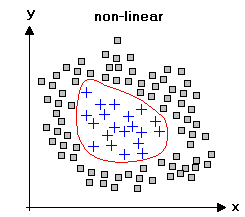

In [212]:
display(Image(filename='NonlinearClassification.png', embed=True))

## Linear vs Logistic Regreession

The figure below illustrates that the logistic regression generally fits the data better relative to a linear regression in the case of a binary outcome $Y \in\{0,1\}.$

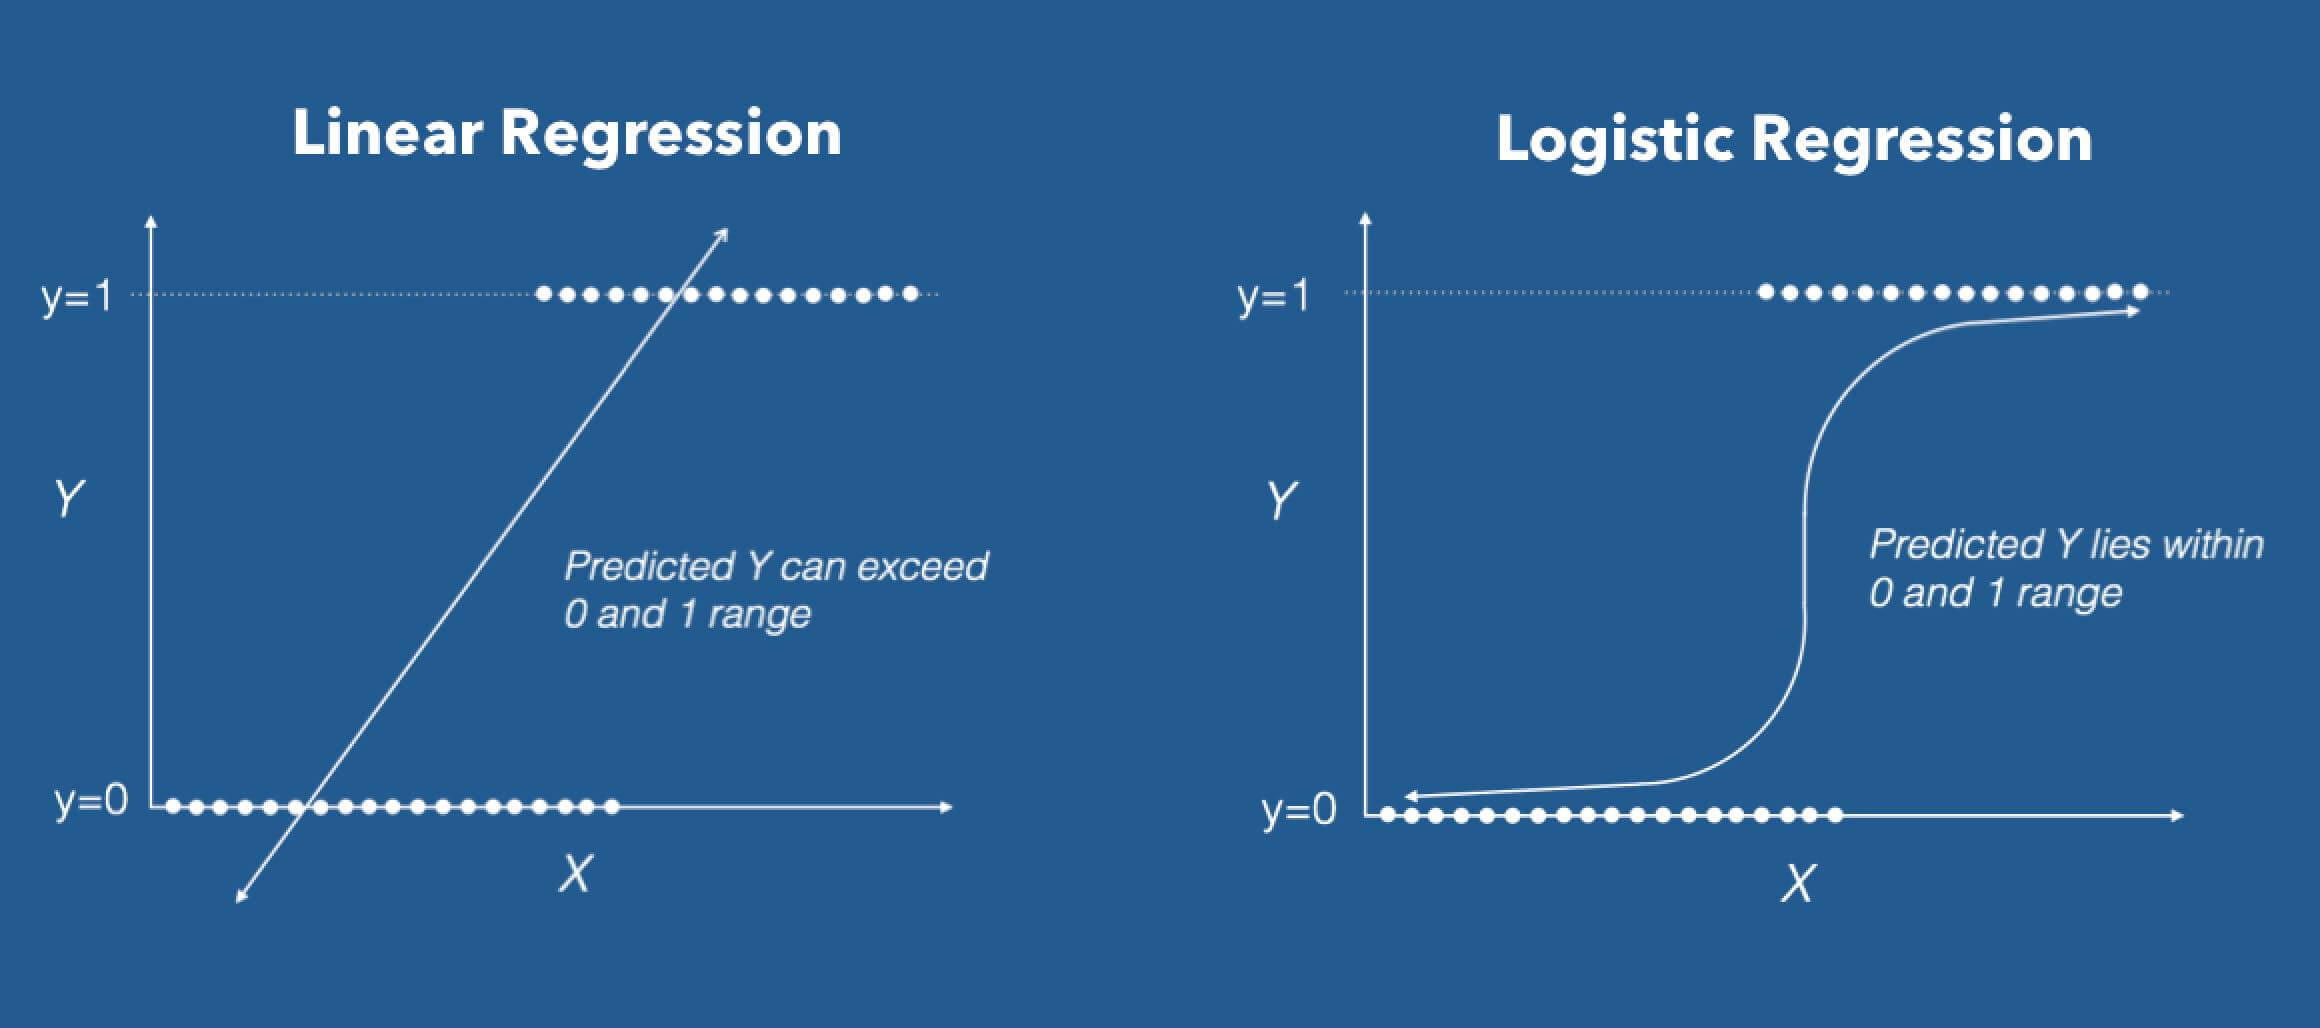

In [2]:
display(Image(filename='LinearVsLogit.jpg', embed=True))

## Maximum Likelihood Estimation Introduction 

Suppose we have some data $D_{1}, D_{2}, \ldots, D_{n},$ where $D_{i}$ is a binary variable. For example we can have a sequence of Heads or Tails, $D_{i} = 1$ if heads, and $D_{i} = 0$ for tails. We can model the distribution of this data using a Bernoulli distribution, that is $P(D_{i} = 1) = p,$ and hence $P(D_{i} = 0) = 1-p,$ where $p$ is a unknown parameter. In summary the probability distribution function from which this data is drawn from is $$P(D_{i};p) = p^{D_{i}}(1-p)^{(1-D_{i})},$$ where $p \in [0,1]$ is a parameter, and $D_{i} \in \{0,1\}$ is a binary variable. For those having trouble understanding the function, think about what happens to $P(D_{i})$ when $D_{i} = 1$ or $D_{i} = 0.$

Now our goal is to compute $\hat{p},$ the estimate for the parameter $p$ (example probability of heads, assume coin may not be fair). For estimation we will use the data we have, $D_{1}, D_{2}, \ldots, D_{n}.$ For example we know $k < n$ coin tosses landed heads, and the rest $n-k$ are tails. If we assume the data is independantly drawn from $P(D)$ (ex. landings heads now is independant of previous coin flip) then we can define the likelihood of the data as $$L(p) = P(D_{1}, D_{2}, \ldots, D_{n}; p) =  P(D_{1};p)P(D_{2};p)\ldots P(D_{n};p),$$ where $L(p)$ is the likelihood of the data given the parameter $p.$ The idea behind estimating $p$ is essentially we want to find $p$ such that the likelihood of getting the observed data from our assumed distribution is high as possible. 

To be more specefic, the estimate of $p$ is $$\hat{p} = argmax_{p}L(p) = argmax_{p} P(D_{1};p)\ldots P(D_{n};p),$$ where the "argmax" says we are finding $p$ to maximimize the likelihood function $L(p) = P(D_{1};p)\ldots P(D_{n};p).$ That is pretty intuitive as we are finding $p$ such that our joint distribution $P(D_{1}, D_{2}, \ldots, D_{n};p)$ best fits the observed data. In this case the likelihood function can be written as $$L(p) = \Pi_{i=1}^{n} p^{D_i}(1-p)^{1-D_{i}} = p^{\sum_{i=1}^{n}D_{i}}(1-p)^{n-\sum_{i=1}^{n}D_{i}}.$$ It turns that maximizing $log(L(p))$ is generally both analytically and computationally easier than maximizing $L(p)$ (since log(.) is a monotonic increasing function, it will effect the maximum). So now we have $$log(L(p)) = (\sum{D_i})log(p) + (n - \sum{D_i})log(1-p).$$ After differentiating with respect to $p$ and setting it equal to 0, we can derivce $$\hat{p} = \frac{\sum{D_i}}{n},$$ where $\hat{p}$ is essentially the proportion of 1s in our sample (ex. proportion of heads). This result is quiet intuitive, is we flip a coin a 100 times, and get 40 heads, then the maximum likelihood estimate for the probability the coin lands on heads is 0.4.

The entire estimation process discussed above is known as Maximum Likelihood Estimation. We will now use MLE to derive a estimation strategy for the logistic regression parameters.  

## Deriving Objective Function Using MLE

This section will show how to estimate the parameters in a logistic regression using maxmimum likelihood estimation. In the previous section we proposed the following predictive model $$Pr(X;\beta_{0},\ldots,\beta_{k}) = Pr(Y = 1|X) = \frac{1}{1 + e^{-(\beta_{0} + \beta_{1}X_{1} + \ldots + \beta_{k}X_{k})}},$$ where the model depends on $k$ unknown parameters. Given our training set $\left(y_{i}, X_{1i}, \ldots, X_{ki}\right),$ where $i = 1,\ldots,n$ we need to estimate the parameters $\beta_{0}, \beta_{1}, \ldots, \beta_{k}$ such that prediction $P(X; \beta_{0}, \ldots, \beta_{k})= {P(Y = 1|X)}$ best fits the training data. 

$$L(\beta_{0},\beta_{1},\ldots, \beta_{k}) = Pr(Y_{1},\ldots,Y_{k}|X_{1},\ldots,X_{k})$$

$$ = Pr(Y_{1}|X_{1}) \times \ldots \times Pr(Y_{n}|X_{n}) = P(x_1)^{y_1} \times \ldots \times P(x_n)^{y_n} \times (1-P(x_1))^{1-y_{1}} \times \ldots \times (1-P(x_n))^{1-y_{n}}$$

$$log(L(\beta_{0},\beta_{1},\ldots, \beta_{k})) = \sum_{i=1}^{n} (y_{i}P(x_{i}) + (1-y_{i})(1-P(x_{i})),$$ where recall that $P(x_{i}) = \frac{1}{1+e^{-(\beta_{0} + \beta_{1}X_{1i} + \ldots + \beta_{k}X_{ki})}}$ and $y_{i} \in \{0,1\}$ is a binary outcome.

$$log(L) = -\sum_{i=1}^{n}[(\beta_{0} + \beta_{1}X_{1i} + \ldots + \beta_{k}X_{ki})(1-y_{i}) + log(1+exp(\beta_{0} + \beta_{1}X_{1i} + \ldots + \beta_{k}X_{ki}))]$$

$$\frac{dlog(L)}{d\beta} = \begin{cases} 
      \frac{dlog(L)}{d\beta_{0}} = \sum_{i=1}^{n}(p(x_{i})-y_{i}) \\
      \frac{dlog(L)}{d\beta_{l}} = \sum_{i=1}^{n}X_{li}(p(x_{i})-y_{i}) \ \text{for} \ l = 1,\ldots, k.
   \end{cases}
$$

Now let us write everything above in matrix notation so its easier for us to implement this python code. Let 

$$
\beta = \begin{bmatrix}
    \beta_{0} \\ 
    \vdots \\
    \beta_{k}
\end{bmatrix}, 
X = \begin{bmatrix}
    1 & X_{11} & \ldots & X_{k1} \\ 
    \vdots & \vdots &  \ddots & \vdots \\
    1 & X_{1n} & \ldots & X_{kn}
\end{bmatrix},
y = \begin{bmatrix}
    y_{1}  \\ 
    \vdots \\
    y_{n}
\end{bmatrix},
p(x) = \begin{bmatrix}
    p(x_{1})  \\ 
    \vdots \\
    p(x_{n})
\end{bmatrix},
$$

then $\frac{dlog(L)}{d\beta} = X'(p(x) - y).$ It turns out $\frac{dlog(L)}{d\beta} = 0$ does not have a analytical solution, so we will need to use numerical methods to find the maximize objective $log(L)$. 

## Gradient descent to Estimate Parameters

Gradient descent is a very popular algorithm for numerically computing the local minimums of functions. For those interested in learning about gradient descent, read my [notebook here](https://github.com/hammadshaikhha/Math-of-Machine-Learning-Course-by-Siraj/tree/master/Gradient%20Descent%20for%20Optimization). For this logistic regression notebook we will directly apply gradient descent directly (remember that maximizing f(x) same as minimizing -f(x)).

Let $\beta^{t} = \begin{bmatrix}
    \beta_{0}^{t} \\ 
    \vdots \\
    \beta_{k}^{t}
\end{bmatrix}$ represent the vector of parameter (weights) of the logistic regression at itteration $t$, then gradient descent algorithm can be described by the following update rule:

$$\beta^{t+1} = \beta^{t} - \lambda \frac{dlog(L;\beta_{t})}{d\beta_{t}},$$ where $t$ is the gradient descent itteration, and $\lambda$ is the learning rate. Plugging in the gradient results in $$\beta^{t+1} = \beta^{t} - \lambda X'(p(x;\beta^{t}) - y),$$ where $dim(\beta^{t+1}) = (k+1)\times 1, dim(X') = (k+1) \times n,$ and $dim(p(x;\beta^{t})-y) = n \times 1.$ Hence both the LHS and RHS is dimension $(k+1)\times 1.$ For large $t,$ we will have $|\beta_{t+1} - \beta_{t}| \approx 0$ at which stage we will have found the estimate $\hat{\beta}.$ In this notebook I won't discuss how to pick the learning rate $\lambda,$ that topic deserves its own notebook. 

## Data Description

The data comes from Lindo et al. (2010, AEJ), the authors examine the causal impact of academic probation policy on student retention. I use a relevant subset of this data to predict whether student will ever go academic probation from university based on their performance in first year and other demographic characteristics. The full data is publicly availbale through the [journals website](https://www.aeaweb.org/articles?id=10.1257/app.2.2.95). The standard logistic regression (discussed above) will be used as the predictive model. 

The data contains student level data from a large Canadian university. The data includes student characteristics such as their gender, age, first year GPA, whether they are Canadian, high school percentile, and whether they ever went on academic probation. This is relatively large data set with over 40,000 students.

In [14]:
# For matrix computation
import numpy as np
# For data manipulation 
import pandas as pd
# Dividing numbers
from __future__ import division

# Load data set and display first few observations
dataset = pd.read_csv("AcademicProbationData.csv")
dataset.head()

,Constant,credits_earned1,CGPA_year1,age_at_entry,canadian,english,male,hsgrade_pct,probation_ever,goodstanding_year1
0,1,2.50,3.82,19,1,1,1,91,0,1
1,1,3.25,3.64,19,1,1,0,94,0,1
2,1,3.00,1.95,18,1,1,1,65,0,1
3,1,2.50,3.44,19,1,1,0,76,0,1
4,1,1.50,2.18,18,1,1,1,39,0,1


### Summary Statisticcs

In [15]:
# Summary statistics of outcome variables (mean, stdev, min, max)
OutcomeData = dataset['probation_ever']
OutcomeData.describe()

count    44362.000000
mean         0.196362
std          0.397250
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: probation_ever, dtype: float64

About $20\%$ of the students in the sample end up in academic probation before graduation. We want to predict whether a student will go on academic probation in senior years based on the features below. 

In [16]:
# Summary statistics of student characteristics (mean, stdev, min, max)
FeaturesData = dataset[['credits_earned1','CGPA_year1','age_at_entry','male','english','canadian']]
FeaturesData.describe()

,credits_earned1,CGPA_year1,age_at_entry,male,english,canadian
count,44362.000000,44362.000000,44362.000000,44362.000000,44362.000000,44362.000000
mean,2.622442,2.437429,18.669830,0.382783,0.713719,0.868919
std,0.835894,0.891982,0.742933,0.486071,0.452027,0.337492
min,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000
25%,2.000000,1.850000,18.000000,0.000000,0.000000,1.000000
50%,2.500000,2.500000,19.000000,0.000000,1.000000,1.000000
75%,3.000000,3.100000,19.000000,1.000000,1.000000,1.000000
max,11.000000,4.300000,21.000000,1.000000,1.000000,1.000000


The average first year cummulatative GPA is 2.6, $38\%$ of the students are male, and most of the students are Canadians that enter University at around 18.5 years old. 

## Split data into 70% training and 30% test set

In [17]:
# Introduce column with U[0,1] variable
dataset["uniform"] = np.random.uniform(0,1,len(OutcomeData))

# 70% Training data 
train_data = dataset[dataset["uniform"] < 0.7]

# 30% Test data
test_data = dataset[dataset["uniform"] >= 0.7]

## Implementing Logistic Regression

### Step 1: Define binary outcome variable

In [23]:
# Define academic probation outcome (train and test)
AcadProbationTrain = train_data[['probation_ever']]
AcadProbationTest = test_data[['probation_ever']]

# Convert to numpy array
AcadProbationTrain = AcadProbationTrain.values
AcadProbationTest = AcadProbationTest.values

# Define features (train and test)
Xtrain = train_data.iloc[:,0:8]
Xtest = test_data.iloc[:,0:8]

# Number of features
NumFeatures = Xtrain.shape[1]

### Step 2: Construct P(X) function for prediction

In [24]:
## Prediction function p(x;beta)
# Takes inputs X and parameter estimates for beta and outputs prediction
def LogitProb(X, beta):
    
    # Data size
    Nsize = X.shape[0]
    
    # Linear function term
    LinearTerm = np.matmul(X,beta)
    
    # Estimates probability
    Phat = 1/(1+np.exp(-LinearTerm))
    
    # Return Phat vector size n x 1
    return Phat.reshape(Nsize,1)

### Step 3: Implement gradient descent to estimate parameters

In [25]:
## Gradient ascent to maxmize likelihood
def GradAscent(y, X, beta_old, learn_rate, itter_total):
    
    # Size of data
    Nsize = len(X)
    
    # First itteration of gradient ascent
    beta_new = np.subtract(beta_old, (learn_rate/Nsize)*np.matmul(np.transpose(X), np.subtract(LogitProb(X,beta_old),y)))
    

    # Itterate many times. Gradient descent should converve for large itterations. 
    for itter in range(itter_total):
        
        # Update beta_old
        beta_old = beta_new
        
        # Gradient ascent step
        beta_new = np.subtract(beta_old, (learn_rate/Nsize)*np.matmul(np.transpose(X), np.subtract(LogitProb(X,beta_old),y)))
        
    # Return beta
    return beta_new

## Predict dropout using estimated model

In [26]:
# Randomly generate initial values 
# beta size is (k + 1) x 1
beta_init = np.array([10, -0.3,-3.5,-5,0,-0.5,-0.5,0.5]).reshape(NumFeatures,1)

# Apply gradient ascent to obtain beta_hat
beta_hat = GradAscent(AcadProbationTrain,Xtrain,beta_init,0.1,10000)

# Predict probability of academic probation for each student on training data
# Predict student drops out is probability > 0.5
PridictProbationTrain = LogitProb(Xtrain, beta_hat) > 0.5

### Evauate model on training data

In [32]:
# Mean of predicted probation
prob_mean_train = np.mean(PridictProbationTrain)
print('Mean of predicted probatiion variable: %s' %prob_mean_train)

# Overall accuracy
accuracy_train = np.mean(PridictProbationTrain == AcadProbationTrain)
print('Overall prediction accuracy: %s' %accuracy_train)

Mean of predicted probatiion variable: 0.11714211953
Overall prediction accuracy: 0.917064670195


About $12\%$ of students are predicted to go on academic probation sometime after first year. Note that in the data, about $19\%$ of students actually go on probation. In the training data the probation prediction accuracy is $92\%.$ Although this $92\%$ prediction accuracy is very high, this may be misleading. Imagine if our model predicted that no students went on probation, then we would still get a prediction accuracy is $81\%$ since only $19\%$ of students go on probation. Let us investigate further using other measures of model accuracy. 

In [28]:
# Proportion identified correctly given student predicted to go on probation
precesion_train = np.mean(AcadProbationTrain[PridictProbationTrain==1])
print('Fraction of probation predictions that are correct: %s' %precesion_train)

Fraction of probation predictions that are correct: 0.972451790634


Out of all the students were predicted to go on academic probation from our logistic model, $97\%$ of them actually ended up going on academic probation. This is a encouraging results for the predictive model. However so far we have only validated the model the training data, let us check how the model performs on the new test data. 

### Evauate model on test data

In [29]:
# Predict probability of academic probation for each student on test data
# Predict student drops out is probability > 0.5
PridictProbationTest = LogitProb(Xtest, beta_hat) > 0.5

# Overall accuracy
accuracy_test = np.mean(PridictProbationTest == AcadProbationTest)
print('Overall prediction accuracy: %s' %accuracy_test)


# Proportion identified correctly given student predicted to go on probation
precesion_test = np.mean(AcadProbationTest[PridictProbationTest==1])
print('Fraction of probation predictions that are correct: %s' %precesion_test)

Overall prediction accuracy: 0.915133841783
Fraction of probation predictions that are correct: 0.976420798065


We use the trained model (characterized by the parameter estimates $\hat{\beta}$) on the unseen test data set to predict academic probation after first year. The overall prediction accuracy is still above $90\%$, which suggests the logistic model is a great predictive model for this application. 

## Conclusion

To summarize, this notebook discusses both linear and non-linear binary classification using logistic regression. We compare and contrast the linear and logistic regression and find that logistic regression is a better fit for the data in the case of binary outcomes. The objective function used to estimate the parameters in a logistic regression model is the likelihood function. We showed that the estimates of the logistic regression can be obtained through maximum likelihood estimation. 

After discussing the mathematics underlying logistic regression, we applied it to on a large data set of university students to predict whether a student goes on academic probation sometime after their first year given their first year performance and other demographic characteristics. The logistic regression has a $91\%$ accuracy on the test data in correctly predicting whether a student will go on academic probation sometime after first year. 